In [1]:
from hyperkneefinder import HyperKneeFinder
import numpy as np
import pickle 
import matplotlib.pyplot as plt
%matplotlib ipympl


# test 1

based on data that in the past was tricky

In [22]:
with open('test_dict.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [3]:
X = loaded_dict['x']
Y = loaded_dict['y']
Z = loaded_dict['z']

In [4]:
# using the fitted plane at the x, y coordinates
hkf= HyperKneeFinder(X, Y, Z, name_x='parameter_1', name_y='parameter_2', clean_threshold=0.8)


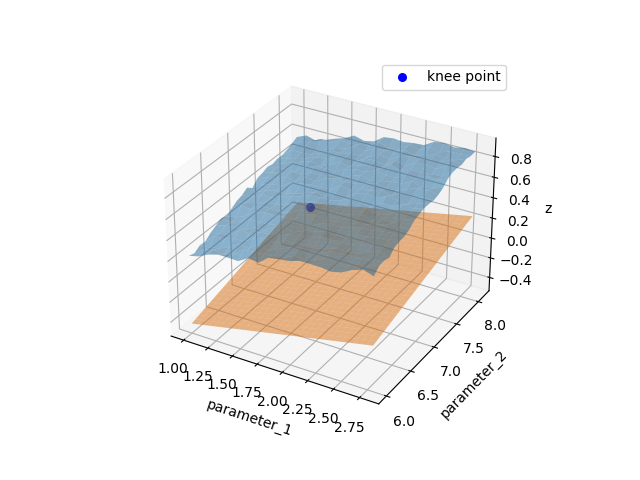

In [5]:
hkf.visualise_hyperknee()

# test 2

Optimisation of DBScan algorithm

In [2]:
with open('test_dict2.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
eps_span = loaded_dict['eps_span']
min_samples_span = loaded_dict['min_samples_span']
Z_cl = loaded_dict['z']

In [5]:
hkf= HyperKneeFinder(eps_span, min_samples_span, Z_cl, name_x='parameter_1', name_y='parameter_2')


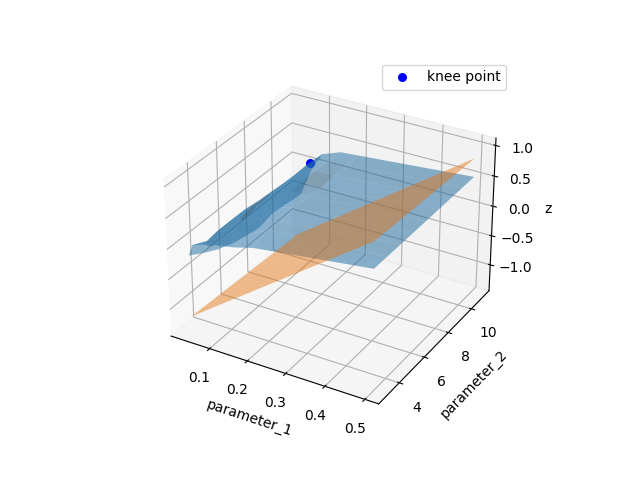

In [6]:
hkf.visualise_hyperknee()

# Test 3

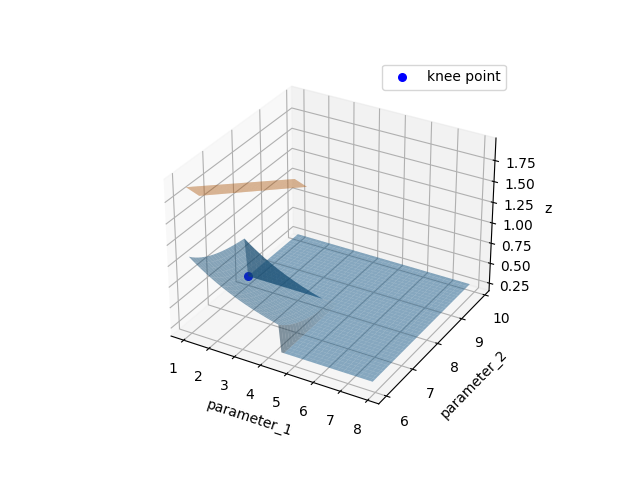

In [15]:
# create the data: two exponential decay plus noise
X = np.arange(1, 8, 0.1)

Y = np.arange(6, 10, 0.1)
Z = np.zeros((len(X), len(Y)))
for i in range(len(X)):
    for j in range(len(Y)):
        #Z[i, j] = np.exp(-2/X[i]) + np.exp(-3/(Y[j]-5)) + np.random.rand()/15
        Z[i, j] = np.exp(-X[i]/3) + np.exp(-(Y[j]-5)) #+ np.random.rand()/45
        
Z[int(len(X)/2):, :] = Z[int(len(X)/2), int(len(Y)/2)] 
Z[:, int(len(Y)/2):] = Z[int(len(X)/2), int(len(Y)/2)] 
# Z[int(len(X)/2):, int(len(Y)/2):] = Z[int(len(X)/2), int(len(Y)/2)] 
hkf= HyperKneeFinder(X, Y, Z, name_x='parameter_1', name_y='parameter_2', clean_data=True, clean_threshold=0.75)
hkf.visualise_hyperknee()

In [8]:
hkf.get_hyperkee_point()

(2.4000000000000012, 6.199999999999999)